In [8]:
from prey_predator.model import WolfSheep
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('seaborn')

/tmp/ipykernel_38978/935159086.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### Without aging effect

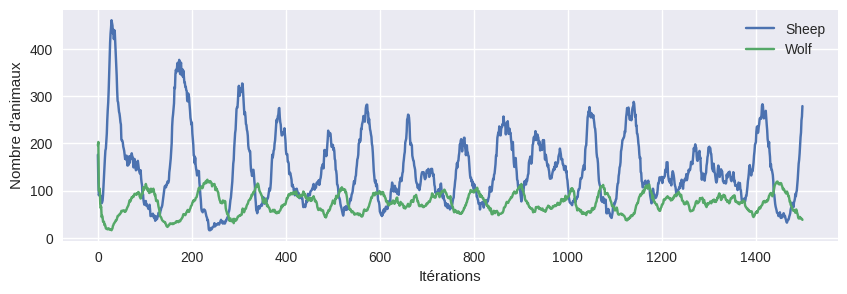

In [25]:
model_params = {
    "width": 20,
    "height": 20,
    "grass": True, 
    'moore': False, 
    'density_sheep': 0.44, 
    'density_wolves': 0.49, 
    'sheep_reproduce': 0.22, 
    'wolf_reproduce': 0.05, 
    'wolf_gain_from_food': 3, 
    'sheep_gain_from_food': 4, 
    'grass_regrowth_time': 7
    }

model = WolfSheep(**model_params)
model.run_model(1_500)
df_model = model.datacollector.get_model_vars_dataframe()

(a, b) = 0, 1500
plt.figure(figsize=(10, 3))
plt.plot(df_model.index[a:b], df_model['Sheep'][a:b], label="Sheep")
plt.plot(df_model.index[a:b], df_model['Wolves'][a:b], label="Wolf")
plt.xlabel("Itérations")
plt.ylabel("Nombre d'animaux")
plt.legend()
plt.show()

### With aging effect

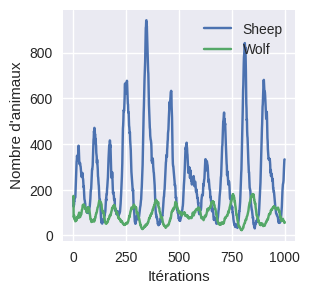

In [30]:
model_params = {
    "width": 20,
    "height": 20,
    "grass": True, 
    'moore': False, 
    'aging_effect': True, 
    'density_sheep': 0.406, 
    'density_wolves': 0.419, 
    'sheep_reproduce': 0.253, 
    'wolf_reproduce': 0.060, 
    'wolf_gain_from_food': 4, 
    'sheep_gain_from_food': 8, 
    'grass_regrowth_time': 9, 
    'death_age_wolf': 29, 
    'death_age_sheep': 19
    }

model = WolfSheep(**model_params)
model.run_model(1_500)
df_model = model.datacollector.get_model_vars_dataframe()

(a, b) = 0, 1000
plt.figure(figsize=(3, 3))
plt.plot(df_model.index[a:b], df_model['Sheep'][a:b], label="Sheep")
plt.plot(df_model.index[a:b], df_model['Wolves'][a:b], label="Wolf")
plt.xlabel("Itérations")
plt.ylabel("Nombre d'animaux")
plt.legend()
plt.show()

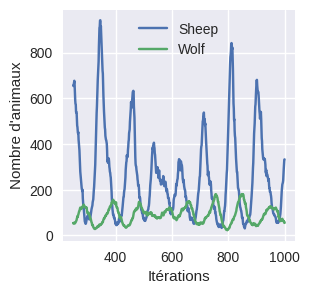

In [31]:
(a, b) = 250, 1000
plt.figure(figsize=(3, 3))
plt.plot(df_model.index[a:b], df_model['Sheep'][a:b], label="Sheep")
plt.plot(df_model.index[a:b], df_model['Wolves'][a:b], label="Wolf")
plt.xlabel("Itérations")
plt.ylabel("Nombre d'animaux")
plt.legend()
plt.show()

### Example of parameters search

In [16]:
df_params = pd.read_parquet('df_params.parquet')

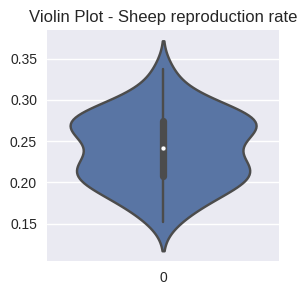

In [19]:
import seaborn as sns
plt.figure(figsize=(3,3))
plt.title('Violin Plot - Sheep reproduction rate')
sns.violinplot(df_params['sheep_reproduce'], bins=10)
plt.show()